### Exploratory Data Analysis - Heart Failure Clinical Records

This dataset is made up with 5000 records of patients who suffer of Heart Failure, and was collected during their follow-up period. 13 characteristics were taken into account at momment of making it.

### Modules and Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Check the existence of the file which will be used

In [2]:
path = os.getcwd()
files = os.listdir(path)
for file in files:
    print (file)

.ipynb_checkpoints
Data Analysis.ipynb
heartFailure.html
heartFailure.ipynb
heartFailure.png
heart_failure_clinical_records.csv
sourceLink.txt


## Load _.csv file_ and Set it a variable

In [3]:
df = pd.read_csv('heart_failure_clinical_records.csv')

- DataFrame Summary

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


## Glimpse of the data frame

In [6]:
display(df.head())

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


## Unique elements of an array

In [7]:
df.anaemia.unique()

array([0, 1], dtype=int64)

In [8]:
df.diabetes.unique()

array([0, 1], dtype=int64)

In [9]:
df.high_blood_pressure.unique()

array([0, 1], dtype=int64)

In [10]:
df.sex.unique()

array([1, 0], dtype=int64)

In [11]:
df.DEATH_EVENT.unique()

array([0, 1], dtype=int64)

## Subset numeric value columns

In [12]:
dfNumeric = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]
display(dfNumeric.head())

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,55.0,748,45,263358.03,1.3,137,88
1,65.0,56,25,305000.00,5.0,130,207
2,45.0,582,38,319000.00,0.9,140,244
3,60.0,754,40,328000.00,1.2,126,90
4,95.0,582,30,461000.00,2.0,132,50


## Subset boolean value columns

In [13]:
dfBoolean = df[['anaemia','diabetes','high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']]
display(dfBoolean.head())

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,0,0,0,1,1,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,1,1,1,1,0,0
4,1,0,0,1,0,1


# Descriptive Analysis

In [21]:
dfNumeric.describe().round(2)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,60.29,586.76,37.73,265075.40,1.37,136.81,130.68
std,11.70,976.73,11.51,97999.76,1.01,4.46,77.33
min,40.00,23.00,14.00,25100.00,0.50,113.00,4.00
25%,50.00,121.00,30.00,215000.00,0.90,134.00,74.00
50%,60.00,248.00,38.00,263358.03,1.10,137.00,113.00
75%,68.00,582.00,45.00,310000.00,1.40,140.00,201.00
max,95.00,7861.00,80.00,850000.00,9.40,148.00,285.00


## Histogram

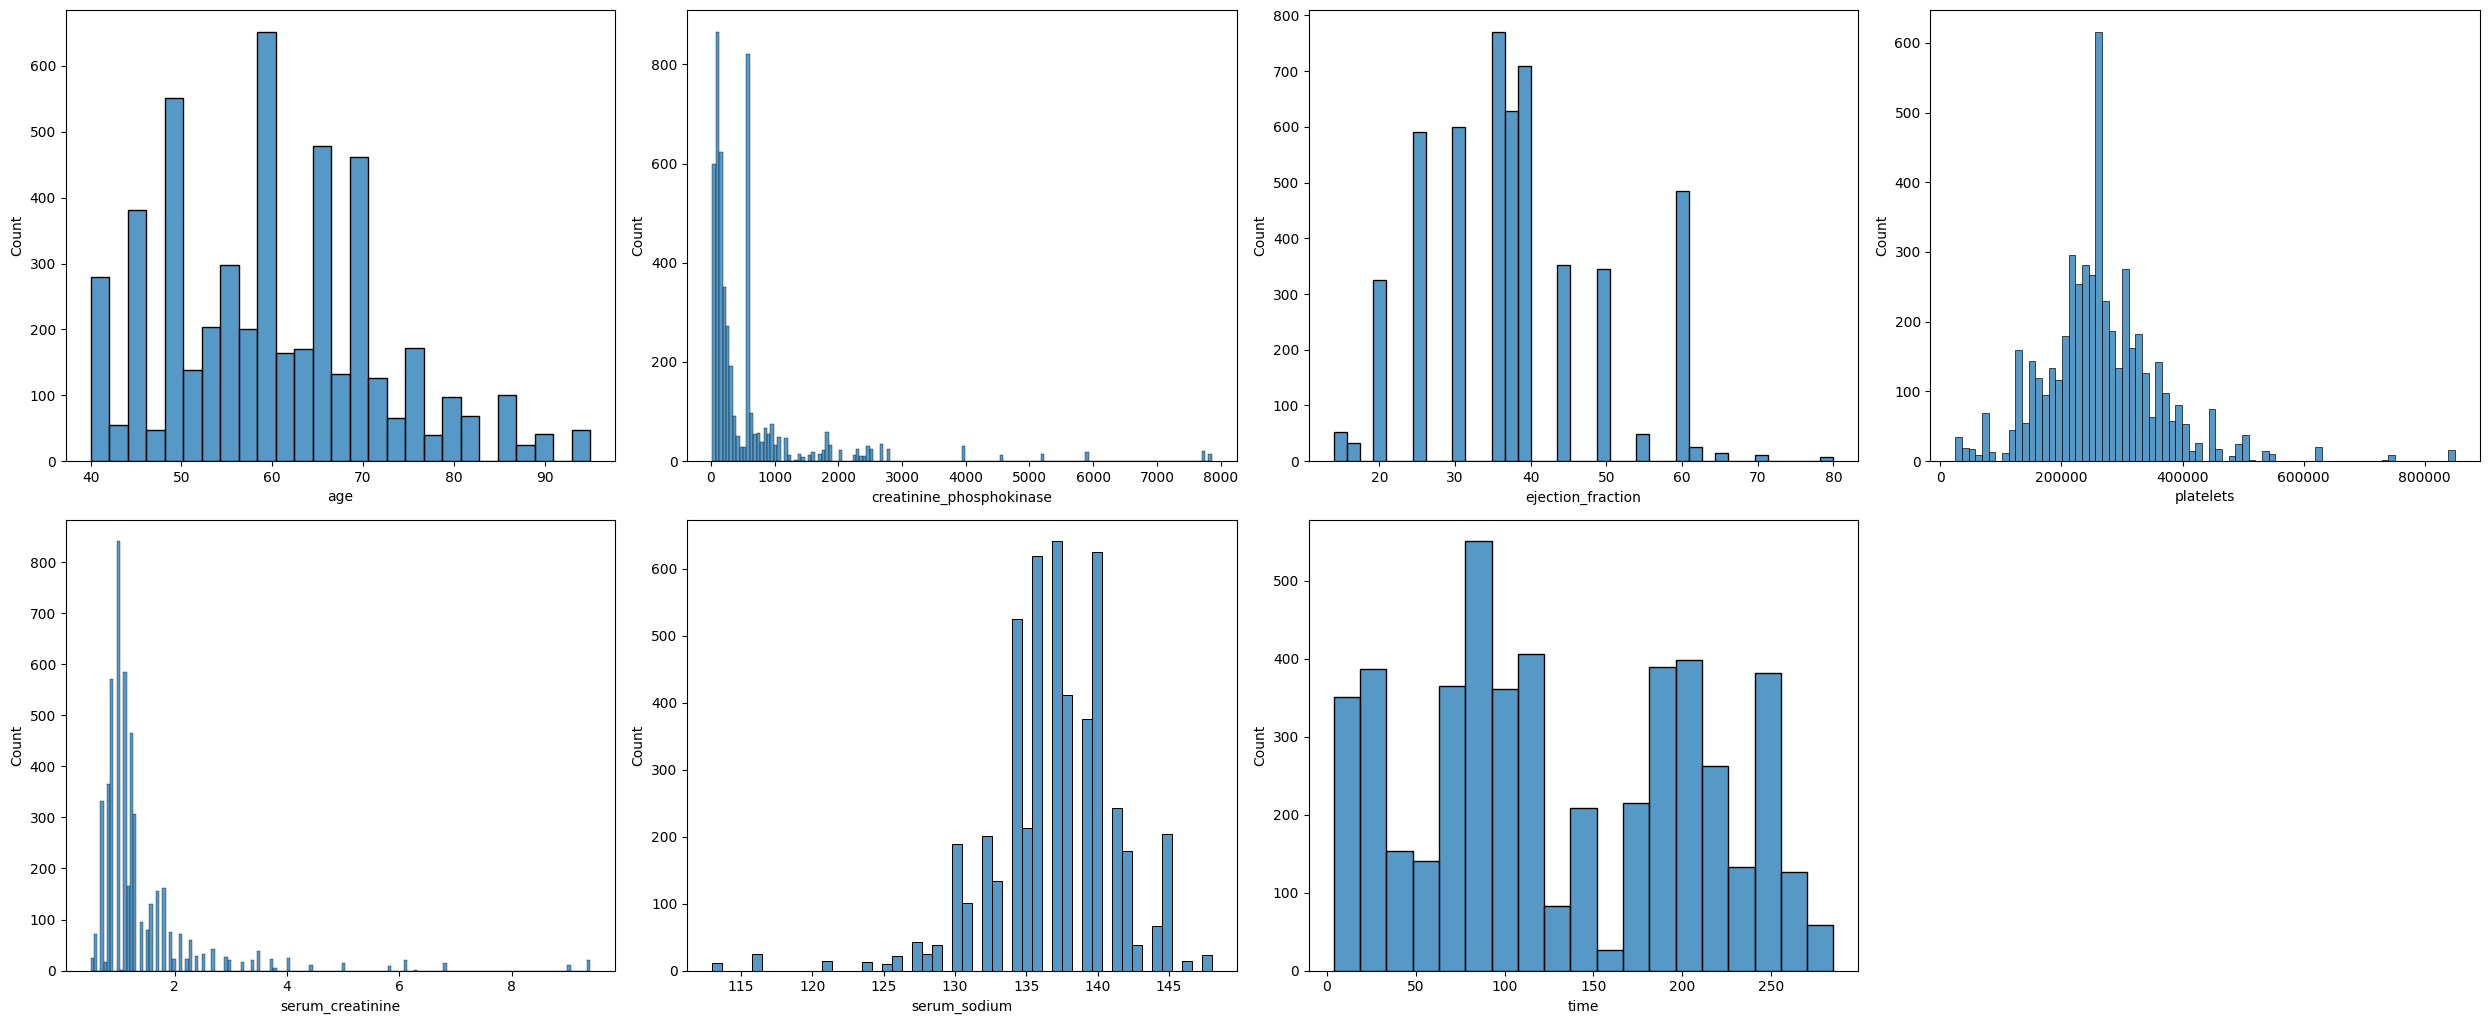

In [15]:
plt.figure(figsize=(25, 15), dpi=100)

for i, columna in enumerate(dfNumeric, start=1):
    plt.subplot(3, 4, i)
    sns.histplot(data=df, x=columna)
    
    plt.tight_layout()

## Barplot

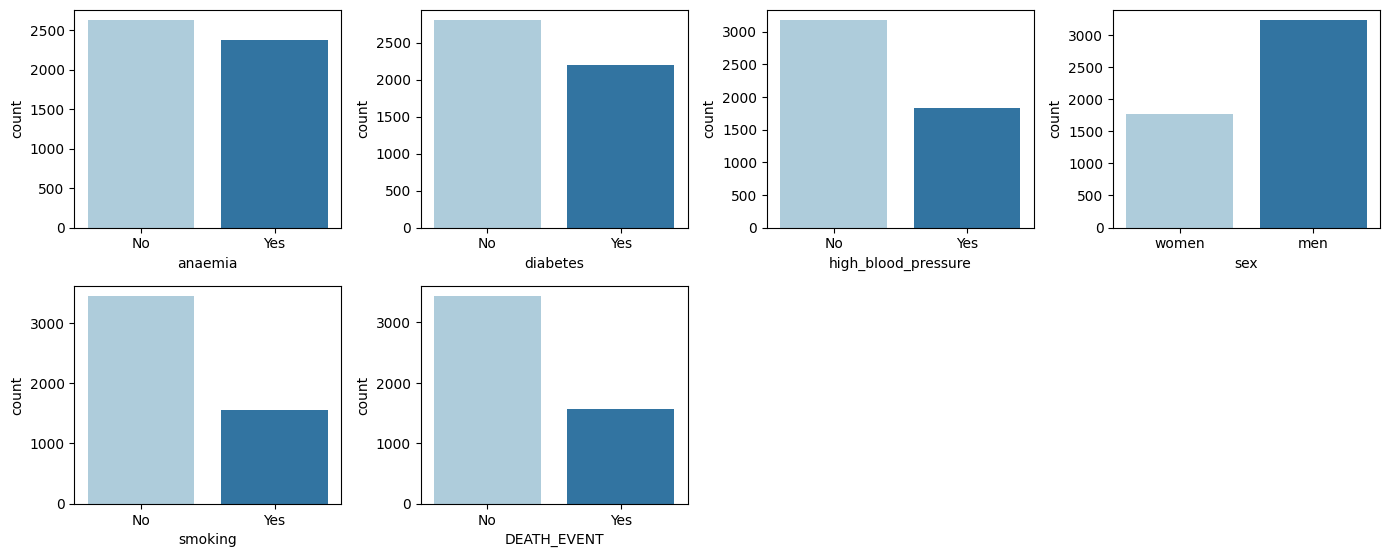

In [16]:
plt.figure(figsize=(14, 8), dpi=100)

for i, columna in enumerate(dfBoolean, start=1):
    plt.subplot(3, 4, i)
    sns.countplot(hue=columna, palette = 'Paired',  data=df, x=columna);
    plt.xticks([0, 1], ['No', 'Yes'])   
    plt.legend().remove()
    if i == 4:
        plt.xticks([0, 1], ['women', 'men'])
    
    
    plt.tight_layout()

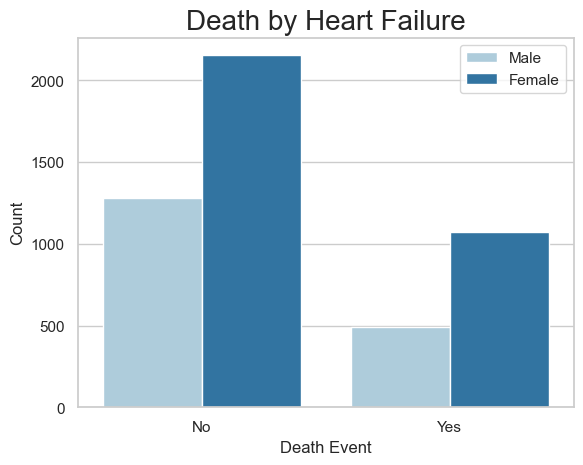

In [25]:
sns.set(style="whitegrid")
plt.title('Death by Heart Failure', fontsize=20)
sns.countplot(x = "DEATH_EVENT", hue="sex", hue_order = [0, 1], palette = 'Paired', data = df);
plt.xlabel('Death Event')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(labels = ['Male', 'Female'])

## Boxplot

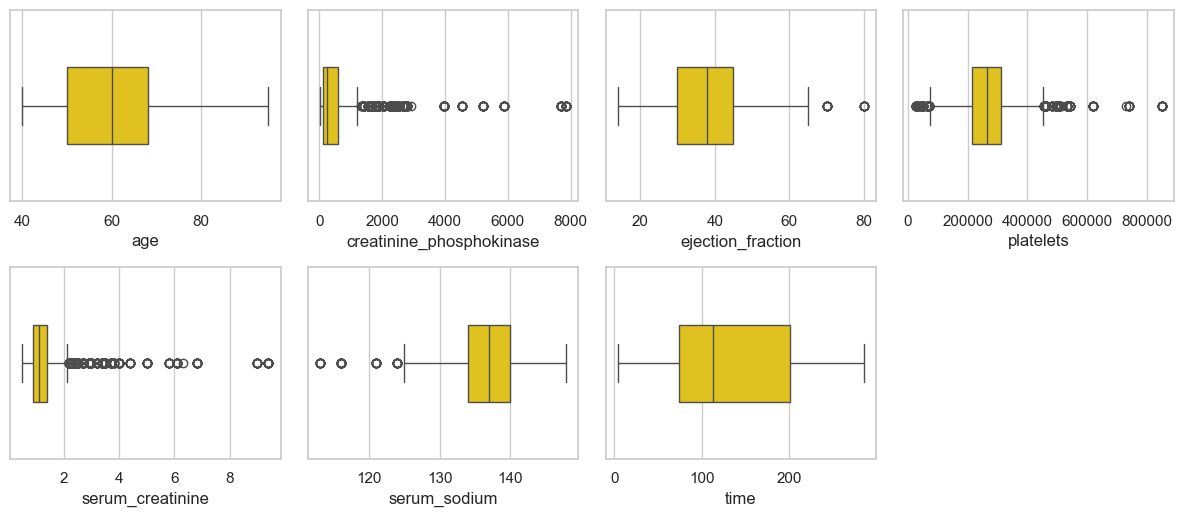

In [26]:
plt.figure(figsize=(12, 10), dpi=100)

for i, columna in enumerate(dfNumeric, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x=columna, color='gold', width=0.4)
    
    plt.tight_layout()

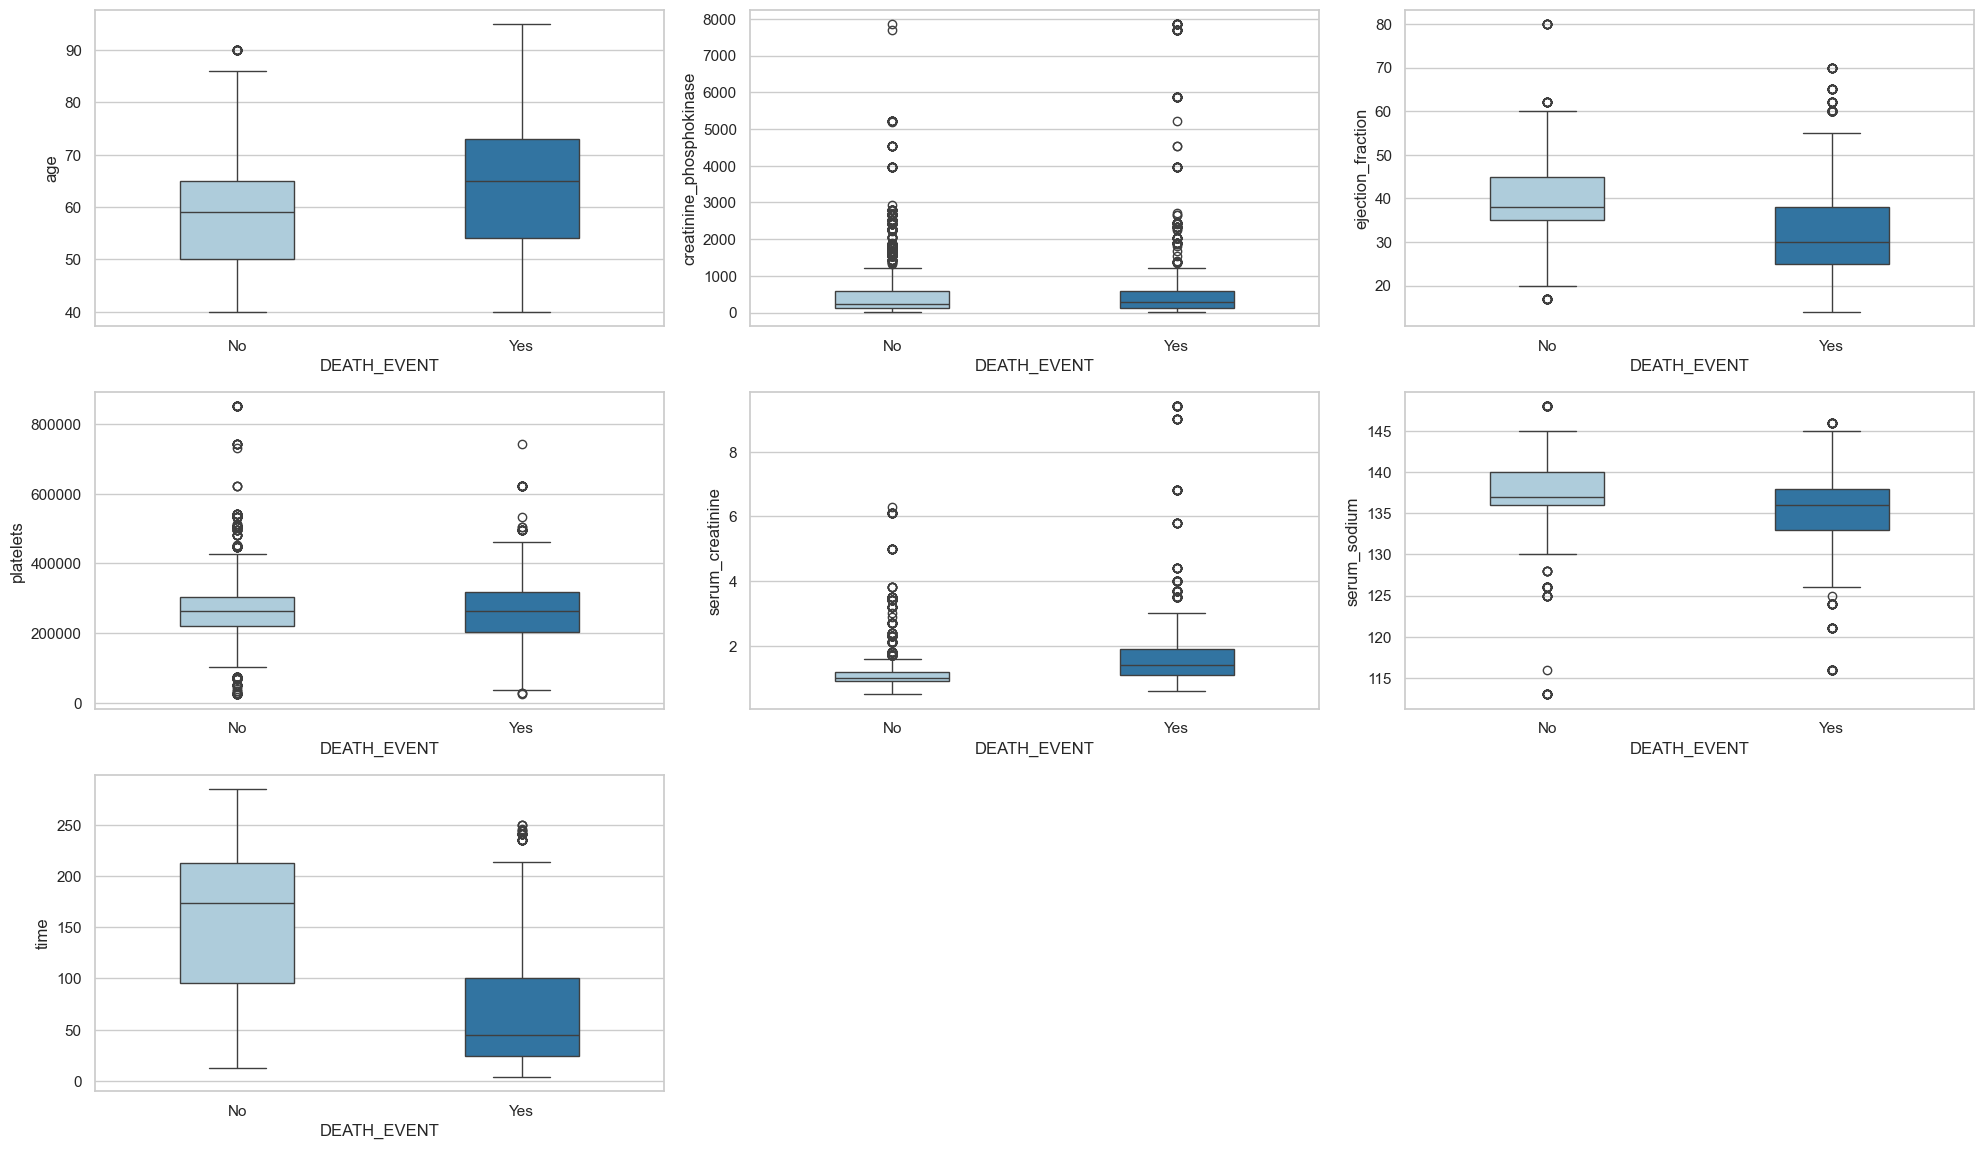

In [27]:
plt.figure(figsize=(20, 15), dpi=100)

for i, columna in enumerate(dfNumeric, start=1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, x='DEATH_EVENT', y=columna, hue='DEATH_EVENT', palette = 'Paired', legend = False, width=0.4)
    plt.xticks([0, 1], ['No', 'Yes'])
    
    plt.tight_layout()